In [1]:
import dianna
import onnx
import onnxruntime
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
data = np.load('./binary-mnist.npz')
X_test = data['X_test'].astype(np.float32).reshape([-1, 28, 28, 1])/255
y_test = data['y_test']

# Predict classes for test data

In [3]:
from scipy.special import softmax

def run_model(data):
    data = data.reshape([-1, 1, 28, 28]).astype(np.float32)*255
    fname = './mnist_model.onnx'
    # get ONNX predictions
    sess = onnxruntime.InferenceSession(fname)
    input_name = sess.get_inputs()[0].name
    output_name = sess.get_outputs()[0].name

    
    onnx_input = {input_name: data}
    pred_onnx = sess.run([output_name], onnx_input)
    
    return softmax(pred_onnx[0], axis=1)


pred_onnx = run_model(X_test)

Print class and image of a single instance in the test data

[1.0000000e+00 7.3871508e-27 2.9928344e-39 1.6600538e-39 1.4391005e-36
 2.0048691e-24 7.2268278e-19 4.1700295e-34 3.6086704e-32 6.5861028e-44]


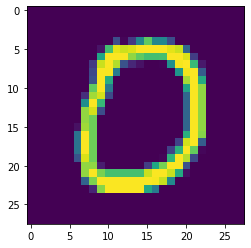

In [4]:
i_instance = 3
print(pred_onnx[i_instance])
plt.imshow(X_test[i_instance][...,0])  # 0 for channel

In [5]:
# heatmaps = dianna.explain(run_model, X_test[[i_instance]], method="RISE", n_masks=2000, feature_res=8, p_keep=0.5)

Explaining: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.24it/s]


In [20]:
from dianna.methods import RISE
explainer = RISE(n_masks=2000, feature_res=8, p_keep=.8)
heatmaps = explainer(run_model, X_test[[i_instance]])

Explaining: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 89.31it/s]


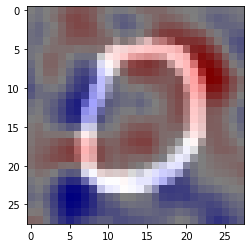

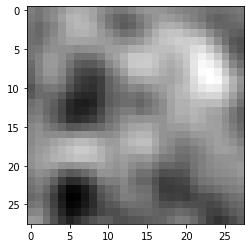

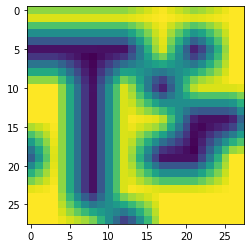

In [21]:
from dianna import visualization
visualization.plot_image(heatmaps[0], X_test[i_instance], data_cmap='gray', heatmap_cmap='bwr')
visualization.plot_image(heatmaps[0], heatmap_cmap='gray')
visualization.plot_image(heatmaps[1])

In [18]:
def describe(arr):
    print('shape:',arr.shape, 'min:',np.min(arr), 'max:',np.max(arr), 'std:',np.std(arr))

describe(heatmaps[0])
describe(heatmaps[1])

shape: (28, 28) min: 0.9686726650433768 max: 1.043115149521071 std: 0.015235230878363563
shape: (28, 28) min: 3.735061158860392e-07 max: 0.00022137450356546595 std: 6.534826426444488e-05


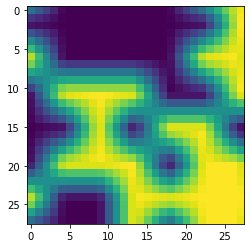

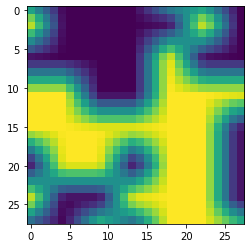

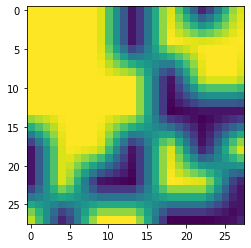

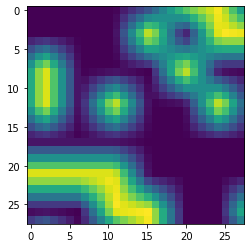

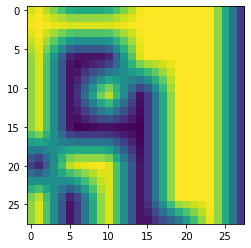

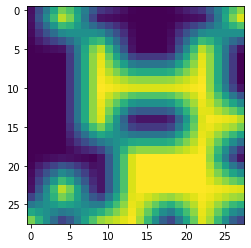

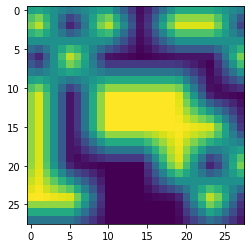

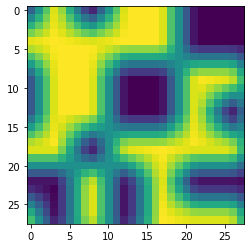

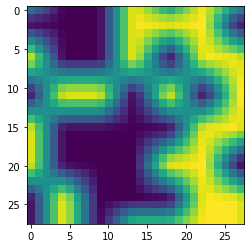

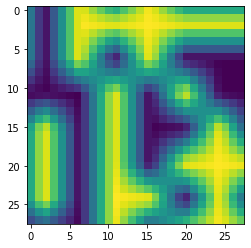

In [19]:
for i in range(10):
    plt.imshow(explainer.masks[i])
    plt.show()